### Unidad 3: Datos textuales de medios de prensa y clasificación

<h1> Notebook 2 - Introducción a la vectorización de palabras: Word2Vec</h1>

En los notebooks anteriores, hemos hablado de los vectores que se utilizan para representar nuestros datos, textuales o no, en una forma matemática, y así poder aplicar métodos de machine learning.

En este notebook, vamos a llevar esta idea un paso más allá y generar reprentaciones vectoriales de las <u>palabras</u>. Esta idea es generalmente llamada __Word Embeddings__. __Word2Vec__ es un algoritmo popular para implementar esta idea.
Esta técnica permite para representar mejor el significado de una palabra.

Para más detalles sobre los fundamentos de Word2Vec, se puede leer: _Efficient Estimation of Word Representations in Vector Space_ [[Mikolov et al., 2013]](https://arxiv.org/pdf/1301.3781.pdf)

## 1. ¿Qué es una representación vectorial de una palabra?

Supongamos que nuestro vocabulario tiene sólo cinco palabras: King, Queen, Man, Woman y Child. Podríamos codificar la palabra 'Queen' como:

<img src="word2vec1.png"/>

Usando tal codificación, no hay comparación interesante que podamos hacer entre vectores de palabras. Con word2vec, se utiliza una representación distribuida de una palabra. Cada palabra está representada por una distribución de pesos entre esos elementos. La representación de una palabra se extiende a través de todos los elementos en el vector, y cada elemento en el vector contribuye a la definición de muchas palabras.

<img src="word2vec2.png"/>

Tal vector llega a representar de alguna manera abstracta el 'significado' de una palabra. Y como veremos a continuación, simplemente examinando un corpus grande es posible aprender vectores de palabras que son capaces de capturar las relaciones entre palabras de una manera sorprendentemente expresiva. 


### Razonamiento con vectores de palabras

Los vectores son muy buenos para responder a problemas de analogía de tipo: '_A_ es a _B_ lo que _C_ es a ...?'. Por ejemplo, el _hombre_ es a la _mujer_ lo que el _tío_ es a la _tía_ usando un método de desplazamiento vectorial.

Por ejemplo, el desplazamiento vectorial que ilustra la _relación de género_:

<img src="word2vec3.png"/>


Este tipo de composición vectorial también nos permite responder a la pregunta __King - Man + Woman = ?__ y llegar al resultado __Queen__.

<img src="word2vec4.png"/>

Estos modelos vectoriales de palabras están destacables ya que permiten representar ciertas relaciones entre palabras sin aportar información sobre la semántica de las palabras. Como vamos a verlo, se pueden aprender los vectores a partir de gran conjuntos de datos textuales.

Algunos ejemples de relaciones entre palabras que se han podido calcular utilizando Word2Vec:

<img src="word2vec6.png"/>

<img src="word2vec7.png"/>

También podemos utilizar la adición de vectores para hacer preguntas como "German + airlines" y mirando las palabras más cercanas al vector compuesto obtenemos respuestas impresionantes:

<img src="word2vec8.png"/>

### Construir una representación vectorial de una palabra _y_ considerando las palabras X que aparacen frecuentemente en su contexto

Para construir sus vectores, Word2Vec utiliza un dataset de entrenamiento y algoritmos de aprendizaje basados en redes neuronales (__Continuous Bag of Words__ (CBOW), o modelo __Skip Gram__). El objetivo de esta fase de aprendizaje es aprender cuáles son las palabras _X_ más probables de aparecer en el contexto de una palabra _y_.

<img src="word2vec5.png"/>

Por ejemplo, ¿cuál es la probabilidad de tener la palabra 'perro' si aparece la palabra 'pelota' en el contexto?

<code>Los expertos explican que los __perros__ persiguen __pelotas__ en movimiento como parte de un comportamiento instintivo. Aunque no todos los perros tienen tan despiertos su instinto de caza, esto no impide que la mayoría de ellos sí disfruten, y mucho, de los juegos que incluyen persecuciones de una saltarina __pelota__ que bota delante de ellos. </code>

__Algoritmo CBOW__

Las palabras de contexto forman la capa de entrada. Si el tamaño del vocabulario es V, estos serán vectores de dimensión V con sólo uno de los elementos establecido en uno, y el resto todos los ceros. Hay una sola capa oculta y una capa de salida.

<img src="word2vec9.png"/>

## 2. Word2Vec: crear representaciones vectoriales de palabras

La clase <code>word2vec</code> de Gensim permite entrenar modelos vectoriales de palabras (ver documentación: https://radimrehurek.com/gensim/models/word2vec.html).

Esta clase tiene varios parametros, en particular:
- <code>sentences</code>: una lista de palabras o de frases que sirve para entrenar el modelo
- <code>sg</code>: define que algoritmos de aprendizaje utilizar (0=CBOW, 1=skip-gram)
- <code>size</code>: define la dimensión de los vectores que se desea extraer
- <code>window</code>: define el número de palabras considerar a la izquierda y a la derecha de una palabra
- <code>min_count</code>: ignorar las palabras que aparecen menos de _min_count_
y otros asociados a la parametrización de la fase de aprendizaje de la red neuronal (que no detallaremos en esta parte del curso):
- <code>alpha</code>: el _learning rate_ utilizado para optimizar los parametros de la red neuronal.
- <code>iter</code>: número de iteraciones (epocas) sobre el dataset para encontrar los parametreos que optimizan la red neuronal.

In [1]:
# import word2vec 
from gensim.models import word2vec

from IPython.display import display, HTML

In [3]:
# list of sentences to learn the model
# sentences = word2vec.Text8Corpus('songs.txt')
sentences = word2vec.Text8Corpus('text8.txt')

# learning modelo, using sentences as input. 
model = word2vec.Word2Vec(sentences, size = 200, hs = 1)

print(model)

/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyboardInterrupt: 

Ahora que hemos aprendido nuestro modelo, tratemos de resolver la ecuación <code>King - Man + Woman</code>.

En otras palabras buscamos cuál es el vector más similar al vector que adiciona positivamente 'King' y 'Woman' y negativamente 'Man'.

In [ ]:
model.wv.most_similar(positive=['woman','king'],negative=['man'],topn=5)

In [ ]:
model.wv.most_similar(positive=["conflict"])

In [ ]:
model.wv.most_similar(positive=["conflict","weapon"])

Para entrenar nuestro modelo Word2Vec, podemos utilizar nuestros propios datasets o utilizar datasets genericos existentes. Para empezar, utilizaremos 100 MB de textos extraidos de Wikipedia en inglés, para generar vectores de 200 dimensiones.

In [ ]:
model.wv.most_similar(positive=["conflict"],negative=["weapon"])

In [ ]:
model.wv.most_similar(positive=["life"])

In [ ]:
model.wv.most_similar(positive=["life","love"])

In [ ]:
model.wv.most_similar(positive=["life","money"])

In [ ]:
model.wv.most_similar(positive=["life","happiness"])

In [ ]:
model.wv.most_similar(positive=["life"],negative=["health"])

Ver los parametros aprendidos por la red neuronal para una palabra dada:

In [ ]:
model.wv['computer']

In [ ]:
model.save("text8_model")
model=word2vec.Word2Vec.load("text8_model")

Otro ejemplo de aplicación: __buscar el vector más diferente de los otros__.

Entre las palabras siguientes, ¿cuál es la palabra la más distinta?

In [ ]:
model.wv.doesnt_match("breakfast cereal dinner lunch".split())

In [ ]:
model.wv.doesnt_match("brazil chile france peru argentina".split())

In [ ]:
model.wv.doesnt_match("apple pear banana hammer".split())

Podemos tambien medir la similaridad entre palabras:

In [ ]:
model.wv.similarity('man','woman')

In [ ]:
model.wv.similarity('man','hammer')

In [ ]:
model.wv.similarity('woman','hammer')

In [ ]:
model.wv.similarity('man','engineer')

In [ ]:
model.wv.similarity('woman','engineer')

In [ ]:
model.wv.similarity('man','baby')

In [ ]:
model.wv.similarity('woman','baby')

El modelo aprendido con la red neuronal captura el significado de las palabras, pero también los sesgos humanos.


Dado que los vectores obtenidos representan mejor el sentido de las palabras que las palabras mismas, sería interesante representar los documentos (textos, moticias) utilizando estos vectores.

Es lo que vamos a observar en la parte siguiente, realizando un benchmark de Word2Vec en comparación con otros enfoques:

## 3. Benchmark de Word2Vec para tareas de clasificación de textos

Realizaremos un benchmark de Word2Vec para resolver tareas de clasificación de textos, utilizando 2 datasets estándares: https://www.cs.umb.edu/~smimarog/textmining/datasets/
- Reuters 8
- Newsgroup 20

In [1]:
from tabulate import tabulate
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from gensim.models.word2vec import Word2Vec
from collections import Counter, defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

In [42]:
TRAIN_SET_PATH = "r8-no-stop.txt"

X, y = [], []
with open(TRAIN_SET_PATH, "r") as infile:
    for line in infile:
        label, text = line.split("\t")
#         print(text)
        # texts are already tokenized, just split on space
        # in a real case we would use e.g. spaCy for tokenization
        # and maybe remove stopwords etc.
        X.append(text.split())
        
#         print(text.split())
        y.append(label)

print(type(X))
X, y = np.array(X), np.array(y)
print ("total examples %s" % len(y))

<class 'list'>
total examples 7674


In [6]:
# start with the classics - naive bayes of the multinomial and bernoulli varieties
# with either pure counts or tfidf features
mult_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
mult_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])
bern_nb_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])
# SVM - which is supposed to be more or less state of the art 
# http://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf
svc = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])
svc_tfidf = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])



In [27]:
import gensim
# let X be a list of tokenized texts (i.e. list of lists of tokens)

# print(X[0])
model = gensim.models.Word2Vec(X, size=100)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

w2v

/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


{'and': array([ 0.32523838,  0.3981546 , -0.2935691 ,  0.12194917, -0.24986815,
        -0.18802081,  0.4126523 ,  0.32119867,  0.08249504,  0.04193051,
         0.3074035 ,  0.08737051,  0.3392753 , -0.47313058, -0.14854759,
        -0.78016   , -0.24157849, -0.20909537, -0.4695635 , -0.13149546,
         0.0414006 ,  0.08744013, -0.49898773,  0.5956505 ,  0.44552547,
        -0.02221733, -0.24747753, -0.397466  ,  0.2278074 ,  0.30343845,
        -0.13560791,  0.49761942,  0.01244549, -0.00523911,  0.31699663,
        -0.48013446, -0.8330108 ,  0.50436187, -0.67822725, -0.14427528,
         0.6114524 ,  0.22925909,  0.11705174,  0.10529707,  0.14288518,
         0.21425574, -0.01974477,  0.65468824, -0.3655173 , -0.45184708,
        -0.66527796,  0.3075564 , -0.16759032, -0.37589264, -0.4474263 ,
        -0.32881546, -0.52027667,  0.16803186, -0.1778201 ,  0.33328733,
        -0.47527537, -0.3841521 , -0.17358711, -0.2944875 , -0.44782415,
         0.06491406,  0.22374214,  0.4236856

In [8]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])


In [9]:
class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.values())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

svc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("svm", SVC(kernel="linear"))])
svc_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("Svm", SVC(kernel="linear"))])

In [11]:
all_models = [
    ("mult_nb", mult_nb),
    ("mult_nb_tfidf", mult_nb_tfidf),
    ("bern_nb", bern_nb),
    ("bern_nb_tfidf", bern_nb_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
    ("trees_w2v", etree_w2v),
    ("trees_w2v_tfidf", etree_w2v_tfidf),
    ("svc_w2v", svc_w2v),
    ("svc_w2v_tfidf", svc_w2v_tfidf),
]


unsorted_scores = [(name, cross_val_score(model, X, y, cv=5).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])


print (tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

model              score
---------------  -------
svc_tfidf         0.9656
svc_w2v_tfidf     0.9569
svc               0.9562
trees_w2v_tfidf   0.9545
svc_w2v           0.9530
trees_w2v         0.9513
mult_nb           0.9467
mult_nb_tfidf     0.8615
bern_nb           0.7954
bern_nb_tfidf     0.7954


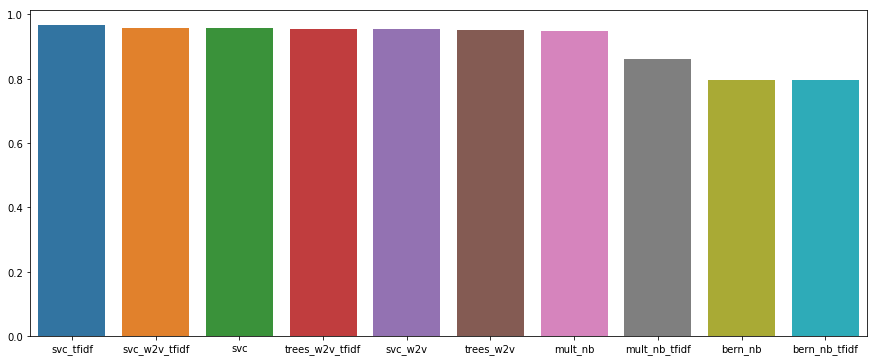

In [12]:
plt.figure(figsize=(15, 6))
sns.barplot(x=[name for name, _ in scores], y=[score for _, score in scores])

In [13]:
def benchmark(model, X, y, n):
    test_size = 1 - (n / float(len(y)))
    scores = []
    sp = StratifiedShuffleSplit(n_splits=5, test_size=test_size)
    sp.get_n_splits(X, y)
    for train, test in sp.split(X, y):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        scores.append(accuracy_score(model.fit(X_train, y_train).predict(X_test), y_test))
    return np.mean(scores)

In [14]:
train_sizes = [10, 40, 160, 640, 3200, 6400]
table = []
for name, model in all_models:
    for n in train_sizes:
        table.append({'model': name, 
                      'accuracy': benchmark(model, X, y, n), 
                      'train_size': n})
df = pd.DataFrame(table)

[Text(0, 0.5, 'accuracy')]

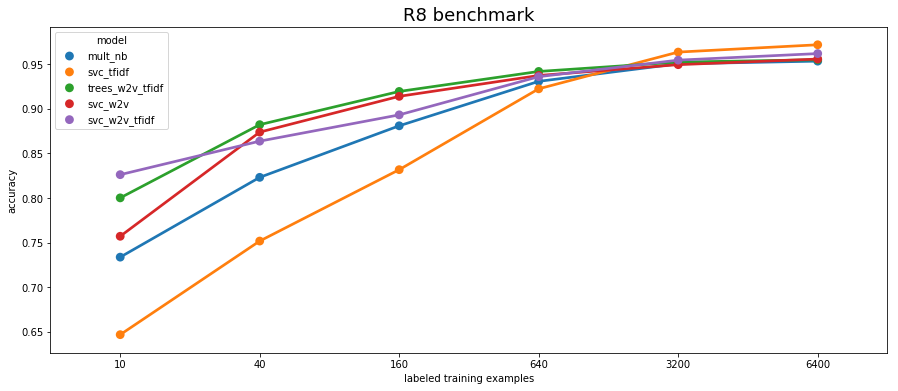

In [15]:
plt.figure(figsize=(15, 6))
fig = sns.pointplot(x='train_size', y='accuracy', hue='model', 
                    data=df[df.model.map(lambda x: x in ["mult_nb", "svc_tfidf", "trees_w2v_tfidf", "svc_w2v","svc_w2v_tfidf" 
                                                        ])])
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="accuracy")
fig.set(xlabel="labeled training examples")
fig.set(title="R8 benchmark")
fig.set(ylabel="accuracy")

Hagamos lo mismo para el dataset Newsgroup 20:

In [28]:
TRAIN_SET_PATH = "20ng-no-stop.txt"

X, y = [], []
with open(TRAIN_SET_PATH, "r") as infile:
    for line in infile:
        label, text = line.split("\t")
        # texts are already tokenized, just split on space
        # in a real case we would use e.g. spaCy for tokenization
        # and maybe remove stopwords etc.
        X.append(text.split())
        y.append(label)
X, y = np.array(X), np.array(y)
print ("total examples %s" % len(y))

print(X)

FileNotFoundError: [Errno 2] No such file or directory: '20ng-no-stop.txt'

In [18]:
# train word2vec on all the texts - both training and test set
# we're not using test labels, just texts so this is fine
model = Word2Vec(X, size=100, window=5, min_count=5, workers=2)
w2v = {w: vec for w, vec in zip(model.wv.index2word, model.wv.syn0)}

/home/leo/Desktop/master_UACH/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


In [19]:
w2v

{'and': array([ 0.53349715,  0.26540923, -0.5834254 , -0.11750466,  0.05279899,
         0.24132916,  0.1567042 ,  0.05211814,  0.0395327 ,  0.2333045 ,
         0.5480928 ,  0.34899923,  0.20964153, -0.22720413, -0.24991362,
        -0.9035742 , -0.4065591 , -0.3100539 , -0.46394864, -0.30611596,
         0.01609557,  0.03264004, -0.44299427,  0.17953637,  0.4688334 ,
         0.02076938, -0.3779004 , -0.35188103,  0.11306994,  0.44700155,
        -0.08078796,  0.70817685,  0.0496306 , -0.26387274,  0.30944312,
        -0.40141466, -0.64814353,  0.43572274, -1.086011  ,  0.00720945,
         0.55736226,  0.23486237,  0.1186812 ,  0.04630915, -0.0243913 ,
         0.5003049 ,  0.17665206,  0.41348764, -0.32740483, -0.7413655 ,
        -0.38580972,  0.07111458, -0.1499772 , -0.25847068, -0.4803575 ,
        -0.08772521, -0.34314072,  0.03747306, -0.19263884,  0.30594897,
        -0.6857577 ,  0.12800431, -0.03797277, -0.15279841, -0.58981705,
         0.06607103,  0.09875232,  0.4507742

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

svc_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("svm", SVC(kernel="linear"))])
svc_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("Svm", SVC(kernel="linear"))])

In [20]:
all_models = [
    ("mult_nb", mult_nb),
    ("mult_nb_tfidf", mult_nb_tfidf),
    ("bern_nb", bern_nb),
    ("bern_nb_tfidf", bern_nb_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
    ("trees_w2v", etree_w2v),
    ("trees_w2v_tfidf", etree_w2v_tfidf),
    ("svc_w2v", svc_w2v),
    ("svc_w2v_tfidf", svc_w2v_tfidf)
]


unsorted_scores = [(name, cross_val_score(model, X, y, cv=5).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])


print (tabulate(scores, floatfmt=".4f", headers=("model", 'score')))

/home/mvernier/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: setting an array element with a sequence.

In [ ]:
train_sizes = [40, 160, 640, 3200, 6400, 9000]
table = []
for name, model in all_models:
    for n in train_sizes:
        table.append({'model': name, 
                      'accuracy': benchmark(model, X, y, n), 
                      'train_size': n})
df = pd.DataFrame(table)

In [ ]:
plt.figure(figsize=(15, 6))
fig = sns.pointplot(x='train_size', y='accuracy', hue='model', 
                    data=df[df.model.map(lambda x: x in ["mult_nb", "svc_tfidf", "w2v_tfidf"
                                                        ])])
sns.set_context("notebook", font_scale=1.5)
fig.set(ylabel="accuracy")
fig.set(xlabel="labeled training examples")
fig.set(title="20 news groups benchmark")
fig.set(ylabel="accuracy")

## 4. Ejercicios - TP

1. Entrenar un modelo Word2Vec para el español. Se puede utilizar agrupar datasets de "Sophia" en un solo dataset grande. 

2. Entrenar distintos modelos de clasificación de textos, utilizando Word2Vec y sin utilizar Word2Vec, para resolver el problema de clasificación siguiente: reconocer automáticamente el medio qlas noticias según el nombre del medio.